In [1]:
import scanpy as sc
import scFates as scf
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
adata=sc.read("old/whole_neocortex/adata_tree.h5ad")

In [4]:
scf.tl.fit(adata,n_jobs=40)

fit features associated with the trajectory
    single mapping : 100%|██████████| 2955/2955 [05:37<00:00,  8.76it/s]
    finished (adata subsetted to keep only fitted features!) (0:06:05) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


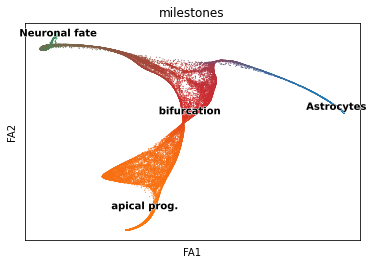

In [5]:
scf.pl.milestones(adata,annotate=True)

In [6]:
root="apical prog."
miles=["Neuronal fate","Astrocytes"]

In [7]:
scf.tl.test_fork(adata,root,miles,n_jobs=40,rescale=True)

testing fork
    single mapping
    Differential expression: 100%|██████████| 2955/2955 [02:01<00:00, 24.39it/s]
    test for upregulation for each leave vs root
    upreg Astrocytes: 100%|██████████| 1722/1722 [00:09<00:00, 178.86it/s]
    finished (0:02:32) --> added 
    .uns['apical prog.->Neuronal fate<>Astrocytes']['fork'], DataFrame with fork test results.


In [57]:
scf.tl.branch_specific(adata,root,miles,effect=.7)

    branch specific features: Astrocytes: 60, Neuronal fate: 28
    finished --> updated 
    .uns['apical prog.->Neuronal fate<>Astrocytes']['fork'], DataFrame updated with additionnal 'branch' column.


In [42]:
scf.tl.activation_lm(adata,root,miles,n_jobs=20,pseudotime_offset=.1)

    single mapping
    prefork activation: 100%|██████████| 130/130 [00:00<00:00, 244.15it/s]
    30 early and 5 late features specific to leave Neuronal fate
    60 early and 35 late features specific to leave Astrocytes
    finished (0:01:02) --> updated 
    .uns['apical prog.->Neuronal fate<>Astrocytes']['fork'], DataFrame updated with additionnal 'slope','pval','fdr','prefork_signi' and 'module' columns.


In [36]:
adata_pre=scf.tl.subset_tree(adata,root,["bifurcation"],copy=True)

subsetting tree
node 7 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:10) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree extracted
--> added 
    .obs['old_milestones'], previous milestones from intial tree


In [43]:
import pandas as pd
sels=np.array_split(adata_pre.obs.sort_values("t"),10)
adata.uns['apical prog.->Neuronal fate<>Astrocytes']["cell_freq"]=[pd.Series(adata.obs_names.isin(sel.index)*1,
                                                                        index=adata.obs_names,
                                                                        dtype=float) for sel in sels]

In [58]:
scf.tl.slide_cors(adata,root,miles)

--> added 
    .uns['apical prog.->Neuronal fate<>Astrocytes']['corAB'], gene-gene correlation modules.


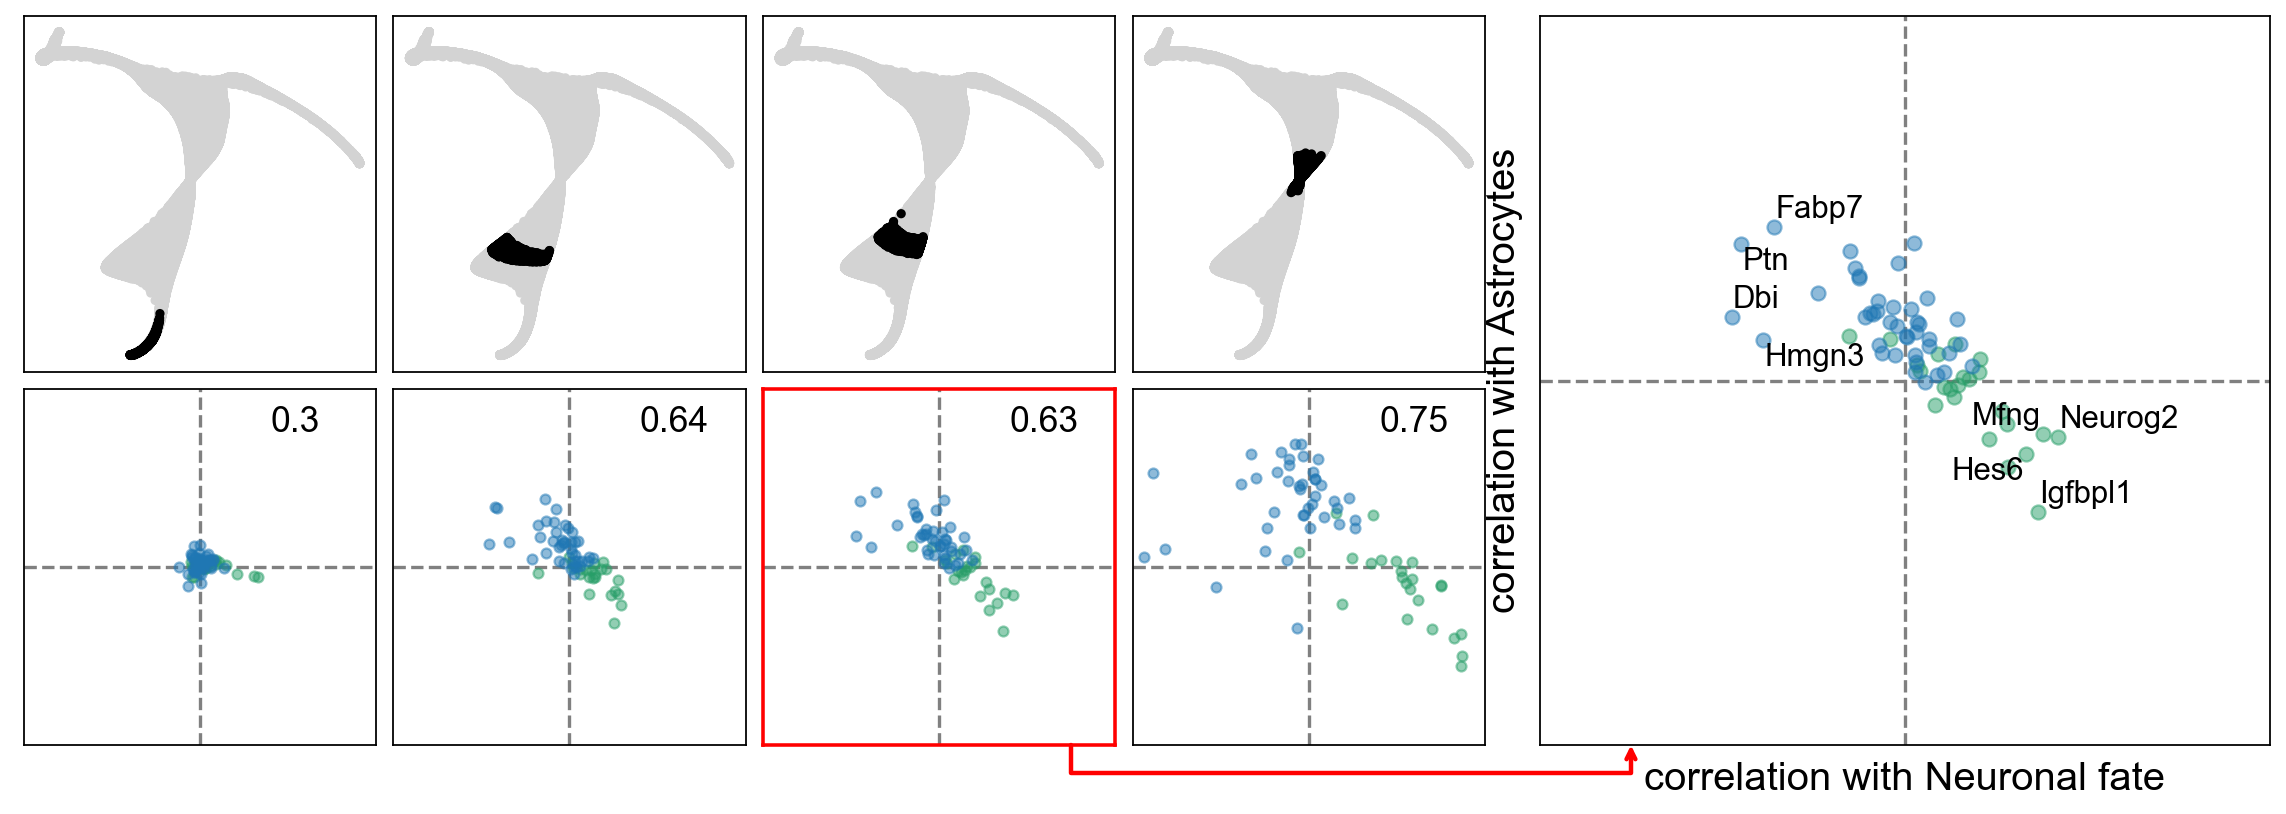

In [59]:
scf.pl.slide_cors(adata,root,miles,basis="draw_graph_fa",win_keep=[0,5,6,9],focus=2)

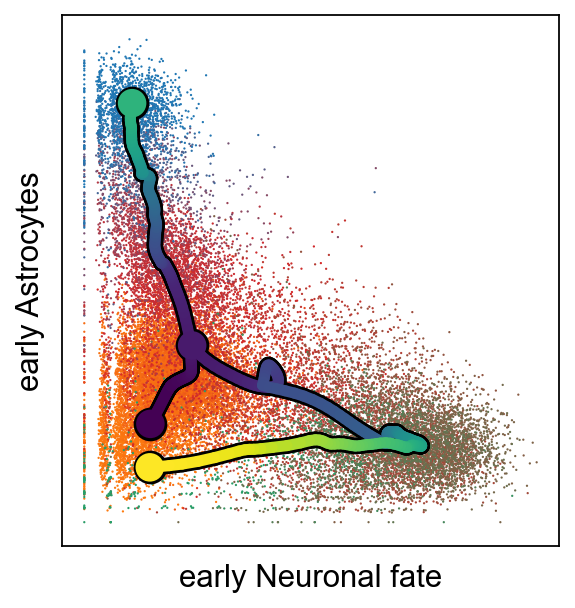

In [60]:
sc.set_figure_params()
scf.pl.modules(adata,root,miles,module="early",show_traj=True)

In [69]:
scf.tl.synchro_path(adata,root,miles,w=500,step=150,winp=50,n_jobs=50,n_map=100)

computing local correlations
    multi mapping permutations: 100%|██████████| 100/100 [03:10<00:00,  1.90s/it]
    finished (0:06:20) --> added 
    .uns['apical prog.->Neuronal fate<>Astrocytes']['synchro'], mean local gene-gene correlations of all possible gene pairs inside one module, or between the two modules.
    .obs['inter_cor apical prog.->Neuronal fate<>Astrocytes'], GAM fit of inter-module mean local gene-gene correlations prior to bifurcation.


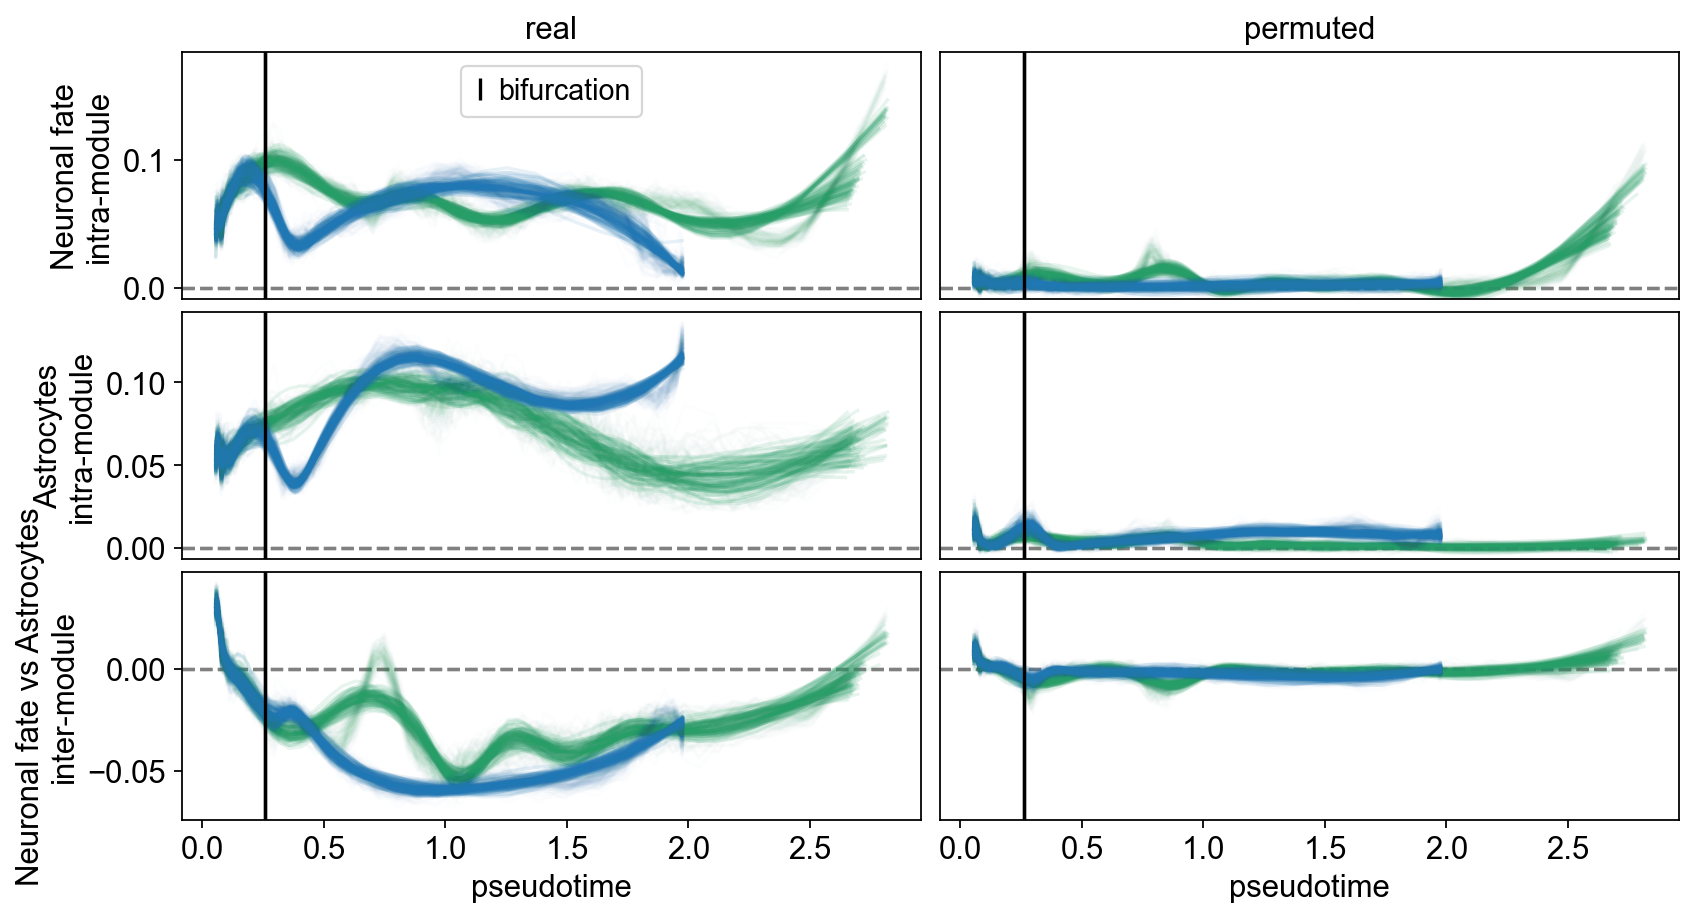

In [70]:
scf.pl.synchro_path(adata,root,miles,knots=20)

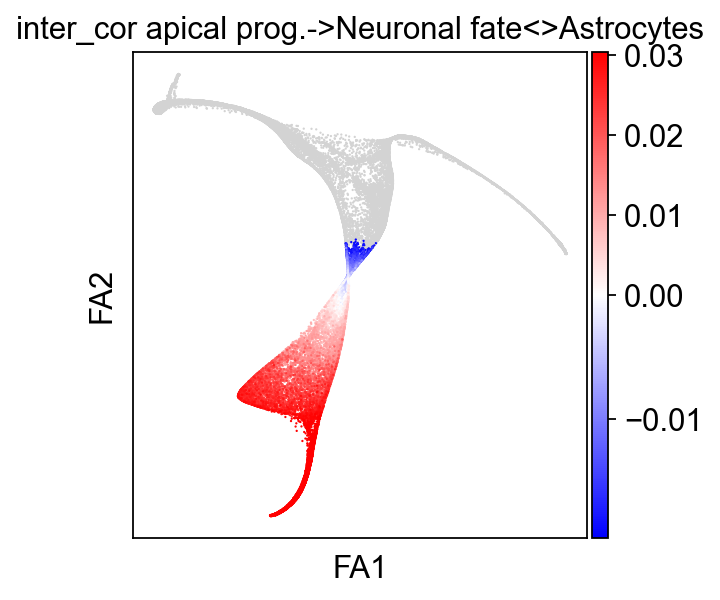

In [71]:
sc.pl.draw_graph(adata,color="inter_cor apical prog.->Neuronal fate<>Astrocytes",vcenter=0,cmap="bwr")

In [72]:
adata.write("adata_final.h5ad")

/home/lfaure/miniconda3/envs/rapids-22.06/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/lfaure/miniconda3/envs/rapids-22.06/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/lfaure/miniconda3/envs/rapids-22.06/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/lfaure/miniconda3/envs/rapids-22.06/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWa